# SQLite, SQL e Pandas

La città di Chicago ha rilasciato un dataset di dati socioeconomici nel Chicago City Portal. Questo dataset contiene una selezione di sei indicatori socioeconomici di rilevanza per la salute pubblica e un indice di difficoltà (hardship index) per ciascuna area comunitaria di Chicago, relativo agli anni 2008-2012.
I punteggi dell'indice di difficoltà variano da 1 a 100, dove un valore più alto indica un livello maggiore di difficoltà.


Una descrizione dettagliata del dataset è disponibile sul [sito della città di Chicago](https://data.cityofchicago.org/).

In [69]:
import sqlite3
%load_ext sql
con = sqlite3.connect("socioeconomic.db")  # connessione
cur = con.cursor()  # cursore
%sql sqlite:///socioeconomic.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Leggo il dataset come csv con pandas.read_csv e poi lo converto in una tabella con il modulo to_sql per poterlo poi analizzare con SQL

In [70]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False, method="multi")

78

In [71]:
!pip install ipython-sql prettytable
import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [72]:
# Vediamo la tabella creata
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [73]:
display(df.head())
print(f'Colonne: {df.columns}')

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


Colonne: Index(['ca', 'community_area_name', 'percent_of_housing_crowded',
       'percent_households_below_poverty', 'percent_aged_16_unemployed',
       'percent_aged_25_without_high_school_diploma',
       'percent_aged_under_18_or_over_64', 'per_capita_income_',
       'hardship_index'],
      dtype='object')


**Quante righe nel dataset**

In [9]:
# SQL
%sql SELECT count(*) from chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


count(*)
78


In [10]:
# Pandas
print(df.shape[0])

78


**Ordinare le aree in ordine alfabetico**

In [99]:
# SQL
%sql select * from chicago_socioeconomic_data order by community_area_name limit 5

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
14.0,Albany Park,11.3,19.2,10.0,32.9,32.0,21323,53.0
57.0,Archer Heights,8.5,14.1,16.5,35.9,39.2,16134,67.0
34.0,Armour Square,5.7,40.1,16.7,34.5,38.3,16148,82.0
70.0,Ashburn,4.0,10.4,11.7,17.7,36.9,23482,37.0
71.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528,74.0


In [101]:
# Pandas
display( df.sort_values(by='community_area_name').head() )

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
13,14.0,Albany Park,11.3,19.2,10.0,32.9,32.0,21323,53.0
56,57.0,Archer Heights,8.5,14.1,16.5,35.9,39.2,16134,67.0
33,34.0,Armour Square,5.7,40.1,16.7,34.5,38.3,16148,82.0
69,70.0,Ashburn,4.0,10.4,11.7,17.7,36.9,23482,37.0
70,71.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528,74.0


**Quante aree con percent_aged_16_unemployed superiore alla media**

In [91]:
# SQL
%sql select count(community_area_name) as areas, round(AVG(percent_aged_16_unemployed)) as avg_percent_aged_16_unemployed from chicago_socioeconomic_data where percent_aged_16_unemployed > (select AVG(percent_aged_16_unemployed) from chicago_socioeconomic_data)

 * sqlite:///socioeconomic.db
Done.


areas,avg_percent_aged_16_unemployed
36,22.0


In [97]:
# Pandas
avg_percent_aged_16_unemployed = df.percent_aged_16_unemployed.mean()
print(f'{df.loc[ df.percent_aged_16_unemployed > avg_percent_aged_16_unemployed].shape[0]} \t media: {avg_percent_aged_16_unemployed:.1f} ' )

36 	 media: 15.3 


**Quante aree hanno hardship_index > 50.0**

In [12]:
# SQL
threshold = 50.0
%sql select count(community_area_name) from chicago_socioeconomic_data where hardship_index > :threshold

 * sqlite:///socioeconomic.db
Done.


count(community_area_name)
38


In [19]:
# Pandas
df1 = df.loc[ df['hardship_index'] > threshold ]
print(df1.shape[0])

38


**Valore massimo di hardship_index**

In [20]:
# SQL
%sql select MAX(hardship_index) from chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [21]:
# Pandas
print(max(df.hardship_index))

98.0


**Area con hardship_index massimo**


In [22]:
# SQL 1
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = (select MAX(hardship_index) from chicago_socioeconomic_data)

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [23]:
#SQL 2
max_hardship_index = 98.0
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = :max_hardship_index

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [54]:
# Pandas
print(df.loc[ df.hardship_index == max_hardship_index].community_area_name)

53    Riverdale
Name: community_area_name, dtype: object


**Area con per-capita income > 60000 $**

In [55]:
# SQL
threshold = 60e3
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_ > :threshold

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


In [56]:
# Pandas
print( df.loc[ df.per_capita_income_ > threshold ].community_area_name )

5           Lake View
6        Lincoln Park
7     Near North Side
31               Loop
Name: community_area_name, dtype: object


**Alcuni scatter plot**



In [74]:
import seaborn

 * sqlite:///socioeconomic.db
Done.


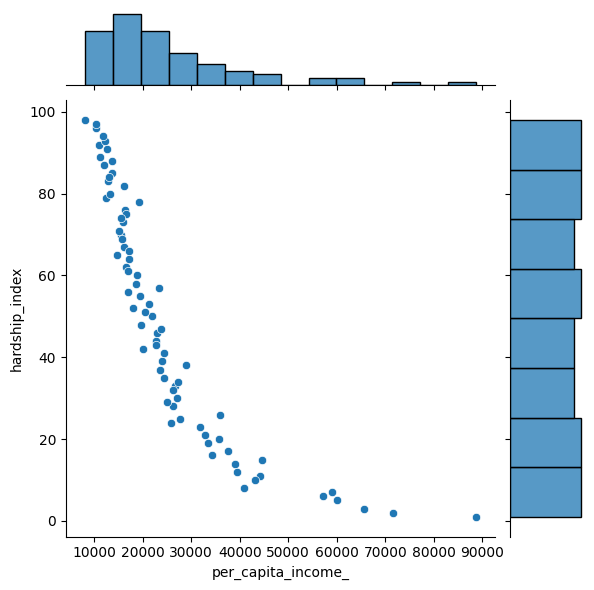

In [75]:
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

# negative correlation

 * sqlite:///socioeconomic.db
Done.


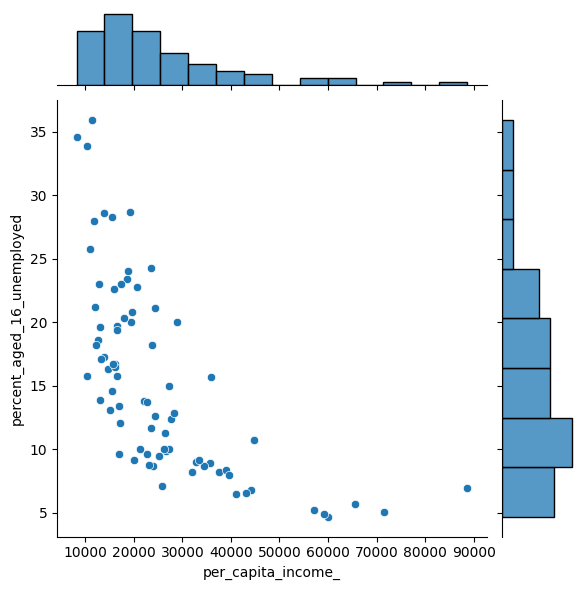

In [58]:
income_vs_unemployed = %sql SELECT per_capita_income_, percent_aged_16_unemployed FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_aged_16_unemployed', data=income_vs_unemployed.DataFrame())

 * sqlite:///socioeconomic.db
Done.


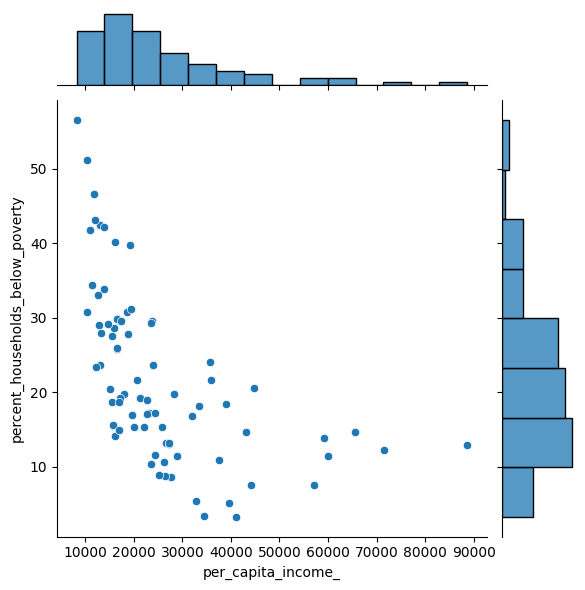

In [68]:
income_vs_poverty = %sql SELECT per_capita_income_, percent_households_below_poverty FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty', data=income_vs_poverty.DataFrame())